In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("C:/Users/ASUS/Desktop/Data set.xlsx")

In [3]:
df = df.dropna(subset=['CustomerID'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Cancellation      406829 non-null  int64         
 1   InvoiceNo         406829 non-null  object        
 2   New Invoice No    406829 non-null  object        
 3   StockCode         406829 non-null  object        
 4   Canceled Qty      406829 non-null  int64         
 5   Not-Canceled Qty  406829 non-null  int64         
 6   Quantity          406829 non-null  int64         
 7   InvoiceDate       406829 non-null  datetime64[ns]
 8   UnitPrice         406829 non-null  float64       
 9   CustomerID        406829 non-null  float64       
 10  Country           406829 non-null  object        
 11  Is_Canceled       406829 non-null  object        
 12  Hour              406829 non-null  int32         
 13  Day               406829 non-null  object        
dtypes: dateti

In [36]:
canceled_qty = df.groupby('Country')['Canceled Qty'].sum()
not_canceled_qty = df.groupby('Country')['Not-Canceled Qty'].sum()

total_qty = canceled_qty + not_canceled_qty

country_cancellation = pd.DataFrame({
    'Total Quantity': total_qty,
    'Canceled Quantity': canceled_qty
}).fillna(0).sort_values('Total Quantity', ascending = False).head(10)


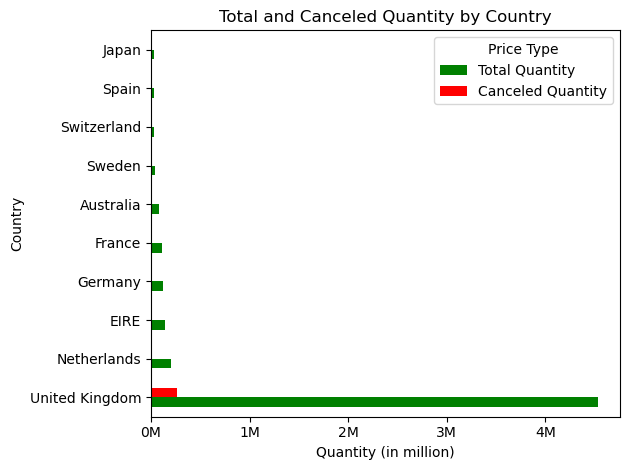

In [45]:
axs = country_cancellation.plot(kind='barh', stacked=False, color=['green', 'red'])

plt.title('Total and Canceled Quantity by Country')
plt.xlabel('Quantity (in million)')
plt.ylabel('Country')

axs.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

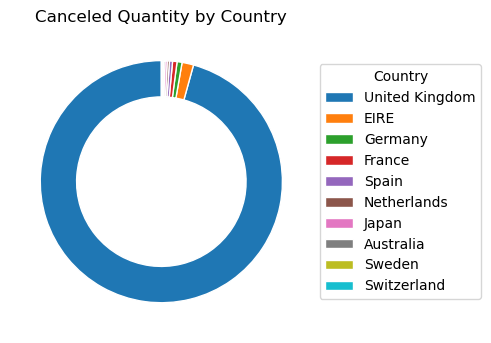

In [71]:
import matplotlib.pyplot as plt

canceled_by_country = country_cancellation['Canceled Quantity']
top_10_countries = country_cancellation.sort_values(by='Canceled Quantity', ascending=False).head(10)

plt.figure(figsize=(5, 5))

wedges, texts = plt.pie(
    canceled_by_country_sorted, 
    startangle=90, 
    wedgeprops=dict(width=0.3, edgecolor='w')  
)

plt.legend(wedges, canceled_by_country_sorted.index, title="Country", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Canceled Quantity by Country')

plt.tight_layout()
plt.show()

In [33]:
df['Total Price'] = df['UnitPrice'] * (df['Canceled Qty'] + df['Not-Canceled Qty'])

In [34]:
df['Canceled Price'] = df['UnitPrice'] * df['Canceled Qty']

In [42]:
df.head()

,Cancellation,InvoiceNo,New Invoice No,StockCode,Canceled Qty,Not-Canceled Qty,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Is_Canceled,Hour,Day,Total Price,Canceled Price
0,1,C536379,536379,D,1,0,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Canceled,9,Wednesday,27.50,27.50
1,1,C536383,536383,35004C,1,0,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Canceled,9,Wednesday,4.65,4.65
2,1,C536391,536391,22556,12,0,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Canceled,10,Wednesday,19.80,19.80
3,1,C536391,536391,21984,24,0,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Canceled,10,Wednesday,6.96,6.96
4,1,C536391,536391,21983,24,0,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Canceled,10,Wednesday,6.96,6.96


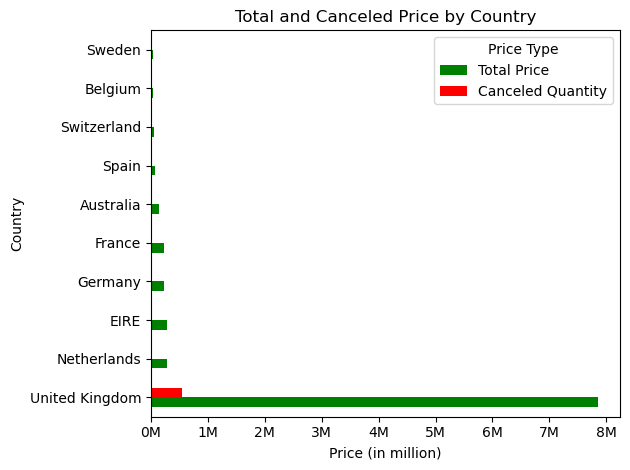

In [44]:
import matplotlib.ticker as ticker

canceled_price = df.groupby('Country')['Canceled Price'].sum()
total_price = df.groupby('Country')['Total Price'].sum()

country_cancellation_price = pd.DataFrame({
    'Total Price': total_price,
    'Canceled Quantity': canceled_price
}).fillna(0).sort_values('Total Price', ascending = False).head(10)


ax = country_cancellation_price.plot(kind='barh', stacked=False, color=['green', 'red'])

plt.title('Total and Canceled Price by Country')
plt.xlabel('Price (in million)')
plt.ylabel('Country')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

In [77]:
customer_analysis = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Canceled Qty': 'sum',
    'Not-Canceled Qty' : 'sum'
}).reset_index()

customer_analysis['Cancellation Rate'] = customer_analysis['Canceled Qty'] / (customer_analysis['Canceled Qty'] + customer_analysis['Not-Canceled Qty'])

print(customer_analysis.head())

   CustomerID  Quantity  Canceled Qty  Not-Canceled Qty  Cancellation Rate
0     12346.0         0         74215             74215                0.5
1     12347.0      2458             0              2458                0.0
2     12348.0      2341             0              2341                0.0
3     12349.0       631             0               631                0.0
4     12350.0       197             0               197                0.0


In [84]:
top_10_customers = customer_analysis.sort_values(by='Cancellation Rate', ascending=False).head(10)

top_10_customers

,CustomerID,Quantity,Canceled Qty,Not-Canceled Qty,Cancellation Rate
2400,15590.0,-1,1,0,1.0
212,12605.0,-4,4,0,1.0
1318,14119.0,-2,2,0,1.0
1384,14213.0,-244,244,0,1.0
264,12666.0,-56,56,0,1.0
3756,17448.0,-1,1,0,1.0
1004,13693.0,-6,6,0,1.0
3126,16579.0,-12,12,0,1.0
3650,17307.0,-144,144,0,1.0
2236,15369.0,-1,1,0,1.0


In [96]:
check_customer = top_10_customers.merge(df[['CustomerID' , 'Country']] , on = "CustomerID" , how = "inner" )

In [97]:
check_customer

,CustomerID,Quantity,Canceled Qty,Not-Canceled Qty,Cancellation Rate,Country
0,15590.0,-1,1,0,1.0,United Kingdom
1,12605.0,-4,4,0,1.0,Germany
2,12605.0,-4,4,0,1.0,Germany
3,12605.0,-4,4,0,1.0,Germany
4,14119.0,-2,2,0,1.0,United Kingdom
5,14213.0,-244,244,0,1.0,United Kingdom
6,14213.0,-244,244,0,1.0,United Kingdom
7,14213.0,-244,244,0,1.0,United Kingdom
8,14213.0,-244,244,0,1.0,United Kingdom
9,14213.0,-244,244,0,1.0,United Kingdom


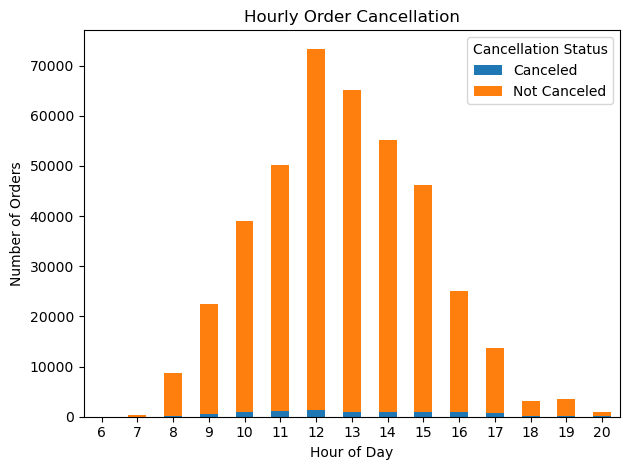

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()

hourly_cancellation = df.groupby(['Hour', 'Is_Canceled']).agg({'InvoiceNo': 'count'}).unstack()
hourly_cancellation.columns = hourly_cancellation.columns.droplevel()

hourly_cancellation.plot(kind='bar', stacked=True)
plt.title('Hourly Order Cancellation')
plt.ylabel('Number of Orders')
plt.xlabel('Hour of Day')
plt.legend(title='Cancellation Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


     StockCode  Quantity  Canceled Qty  Cancellation Rate
2506     84077     53215          1200           0.021577
1022     22197     48712           471           0.009486
3360    85099B     45066          1115           0.023575
2610     84879     35314            48           0.001356
3366    85123A     34204          2578           0.065498
355      21212     33409           284           0.008359
1853     23084     27094           108           0.003955
1286     22492     25880           196           0.007460
1403     22616     25321            24           0.000946
844      21977     24163           101           0.004145


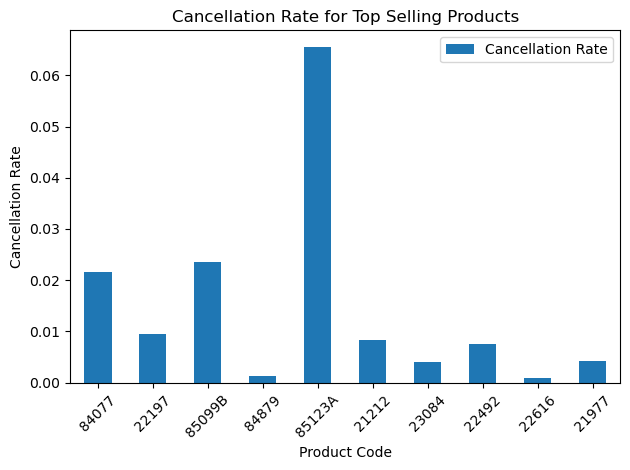

In [98]:
product_analysis = df.groupby('StockCode').agg({
    'Quantity': 'sum',
    'Canceled Qty': 'sum'
}).reset_index()

product_analysis['Cancellation Rate'] = product_analysis['Canceled Qty'] / (product_analysis['Quantity'] + (2* product_analysis['Canceled Qty']))

top_products = product_analysis.sort_values(by='Quantity', ascending=False).head(10)
print(top_products)

top_products.plot(x='StockCode', y='Cancellation Rate', kind='bar')
plt.title('Cancellation Rate for Top Selling Products')
plt.ylabel('Cancellation Rate')
plt.xlabel('Product Code')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
product_analysis = df.groupby('StockCode').agg({
    'Quantity': 'sum',  
    'Canceled Qty': 'sum',  
    'UnitPrice': 'min'  
}).reset_index()

product_analysis['System Error Canceled'] = ((product_analysis['UnitPrice'] == 0) & (product_analysis['Canceled Qty'] > 0))

product_analysis['Cancellation Rate'] = product_analysis['Canceled Qty'] / (product_analysis['Quantity'] + (2 * product_analysis['Canceled Qty']))

top_products = product_analysis.sort_values(by='Quantity', ascending=False).head(50)

print(top_products[['StockCode', 'Quantity', 'Canceled Qty', 'System Error Canceled', 'Cancellation Rate']])

     StockCode  Quantity  Canceled Qty  System Error Canceled  \
2506     84077     53215          1200                  False   
1022     22197     48712           471                  False   
3360    85099B     45066          1115                  False   
2610     84879     35314            48                  False   
3366    85123A     34204          2578                  False   
355      21212     33409           284                  False   
1853     23084     27094           108                  False   
1286     22492     25880           196                  False   
1403     22616     25321            24                  False   
844      21977     24163           101                  False   
37       17003     22960             3                  False   
1003     22178     21984           449                  False   
9        15036     21132           744                  False   
811      21915     20912            63                  False   
1191     22386     19709 

<Figure size 1000x600 with 0 Axes>

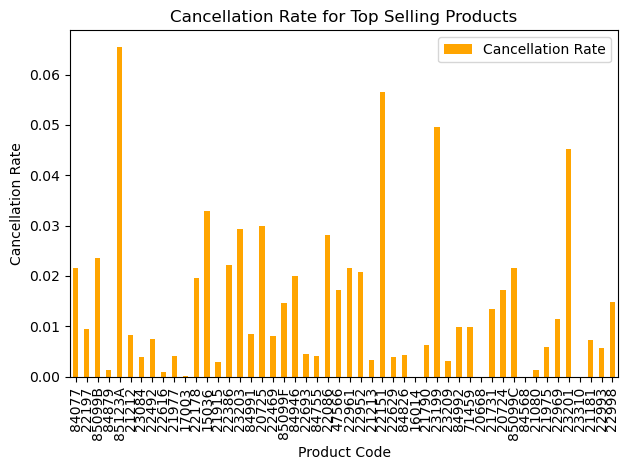

<Figure size 1000x600 with 0 Axes>

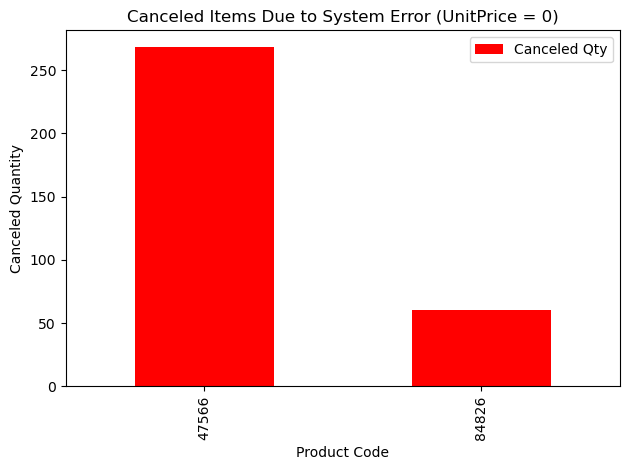

In [106]:
plt.figure(figsize=(10, 6))
top_products.plot(x='StockCode', y='Cancellation Rate', kind='bar', color='orange')

plt.title('Cancellation Rate for Top Selling Products')
plt.ylabel('Cancellation Rate')
plt.xlabel('Product Code')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

plt.figure(figsize=(10, 6))
top_products_system_error = top_products[top_products['System Error Canceled'] == True]
top_products_system_error.plot(x='StockCode', y='Canceled Qty', kind='bar', color='red')

plt.title('Canceled Items Due to System Error (UnitPrice = 0)')
plt.ylabel('Canceled Quantity')
plt.xlabel('Product Code')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()
